<a href="https://colab.research.google.com/github/QuanRy/Machine_Learning/blob/main/lab_3/lab_3_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
import pandas as pd
import numpy as np

df = pd.read_csv("loan200.csv", delimiter=',')
df.head(10)

,outcome,payment_inc_ratio,dti
0,target,9.00000,22.50
1,default,5.46933,21.33
2,paid off,6.90294,8.97
3,paid off,11.14800,1.83
4,default,3.72120,10.81
5,paid off,1.89923,11.34
6,default,2.78485,16.00
7,paid off,13.85620,11.24
8,default,11.68480,27.78
9,default,9.43396,24.15


<Axes: xlabel='dti', ylabel='payment_inc_ratio'>

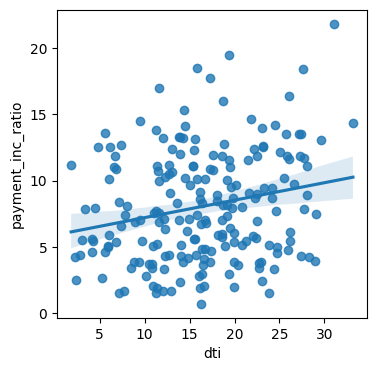

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

# Зависимость dti (отношение долга к доходам) и payment_inc_ratio (коэффициент увеличения платежа)
plt.figure(figsize=(4,4)) 
sns.regplot(x="dti",y = "payment_inc_ratio", data = df)


ДАЛЕЕ ПОПРОБУЕМ ПО-ДРУГОМУ

In [75]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [77]:
training_data = pd.read_csv('loan200.csv')
training_data.head(10)

,outcome,payment_inc_ratio,dti
0,target,9.00000,22.50
1,default,5.46933,21.33
2,paid off,6.90294,8.97
3,paid off,11.14800,1.83
4,default,3.72120,10.81
5,paid off,1.89923,11.34
6,default,2.78485,16.00
7,paid off,13.85620,11.24
8,default,11.68480,27.78
9,default,9.43396,24.15


In [80]:
# Удалим пустые строки 
training_data = training_data.dropna()
training_data.shape

(201, 3)

In [81]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   outcome            201 non-null    object 
 1   payment_inc_ratio  201 non-null    float64
 2   dti                201 non-null    float64
dtypes: float64(2), object(1)
memory usage: 4.8+ KB


In [82]:
# Удалим поле "outcome", т.к. оно текстровое
training_data = training_data.drop(['outcome'], axis=1)

In [83]:
training_data.head()

,payment_inc_ratio,dti
0,9.00000,22.50
1,5.46933,21.33
2,6.90294,8.97
3,11.14800,1.83
4,3.72120,10.81


In [84]:
# в "training_values: используем "payment_inc_ratio" 
training_values = training_data['payment_inc_ratio']
training_points = training_data.drop('payment_inc_ratio', axis=1)
training_points.head()

,dti
0,22.50
1,21.33
2,8.97
3,1.83
4,10.81


In [85]:
training_points.shape

(201, 1)

In [86]:
from sklearn import linear_model, ensemble
linear_regression_model = linear_model.LinearRegression() 
random_forest_model = ensemble.RandomForestRegressor(random_state=123)

In [87]:
linear_regression_model.fit(training_points, training_values)
random_forest_model.fit(training_points, training_values)

RandomForestRegressor(random_state=123)

In [103]:
test_data = pd.read_csv('loan200.csv')
test_data.head(8)

,outcome,payment_inc_ratio,dti
0,target,9.00000,22.50
1,default,5.46933,21.33
2,paid off,6.90294,8.97
3,paid off,11.14800,1.83
4,default,3.72120,10.81
5,paid off,1.89923,11.34
6,default,2.78485,16.00
7,paid off,13.85620,11.24


In [104]:
test_data.shape

(201, 3)

In [105]:
test_data.head()

,outcome,payment_inc_ratio,dti
0,target,9.00000,22.50
1,default,5.46933,21.33
2,paid off,6.90294,8.97
3,paid off,11.14800,1.83
4,default,3.72120,10.81


In [106]:
test_data = test_data.dropna()
test_data = test_data.drop(['outcome'], axis=1)
test_data.head()

,payment_inc_ratio,dti
0,9.00000,22.50
1,5.46933,21.33
2,6.90294,8.97
3,11.14800,1.83
4,3.72120,10.81


In [107]:
test_data.shape

(201, 2)

In [108]:
test_values = test_data['payment_inc_ratio']
test_points = test_data.drop('payment_inc_ratio', axis=1)
test_points.head()

,dti
0,22.50
1,21.33
2,8.97
3,1.83
4,10.81


In [109]:
test_points.shape

(201, 1)

In [110]:
list(test_points)==list(training_points)

True

In [111]:
test_predictions_linear = linear_regression_model.predict(test_points)
test_predictions_random_forest = random_forest_model.predict(test_points)

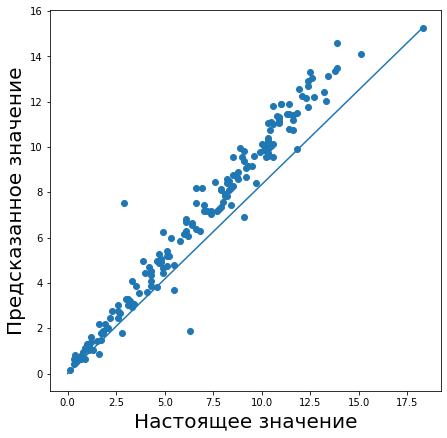

In [ ]:
#Визуализируем прогноз линейной модели и настоящие значения из тестовой выборки
plt.figure(figsize=(7, 7))
plt.scatter(test_values, test_predictions_linear) # рисуем точки, соответствущие парам настоящее значение - прогноз
plt.plot([0, max(test_values)], [0, max(test_predictions_linear)])  # рисуем прямую, на которой предсказания и настоящие значения совпадают
plt.xlabel('Настоящее значение', fontsize=20)
plt.ylabel('Предсказанное значение', fontsize=20);

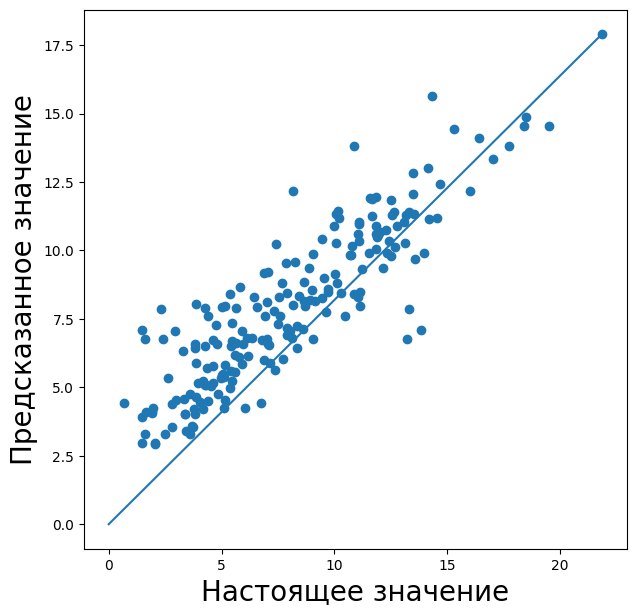

In [112]:
#Визуализируем прогноз модели случайного леса и настоящие значения из тестовой выборки
plt.figure(figsize=(7, 7))
plt.scatter(test_values, test_predictions_random_forest) # рисуем точки, соответствущие парам настоящее значение - прогноз
plt.plot([0, max(test_values)], [0, max(test_predictions_random_forest)]) # рисуем прямую, на которой предсказания и настоящие значения совпадают
plt.xlabel('Настоящее значение', fontsize=20)
plt.ylabel('Предсказанное значение', fontsize=20);

In [113]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [114]:
mean_absolute_error_linear_model = mean_absolute_error(test_values, test_predictions_linear)
mean_squared_error_linear_model = mean_squared_error(test_values, test_predictions_linear)
r2_score_linear_model = r2_score(test_values, test_predictions_linear)

In [115]:
mean_absolute_error_random_forest_model = mean_absolute_error(test_values, test_predictions_random_forest)
mean_squared_error_random_forest_model = mean_squared_error(test_values, test_predictions_random_forest)
r2_score_random_forest_model = r2_score(test_values, test_predictions_random_forest)

In [116]:
print("MAE: {0:7.2f}, RMSE: {1:7.2f}, R2: {2:7.2f} for linear model".format(
        mean_absolute_error(test_values, test_predictions_linear), 
        mean_squared_error(test_values, test_predictions_linear)**0.5, r2_score_linear_model))

print("MAE: {0:7.2f}, RMSE: {1:7.2f},  R2: {2:7.2f} for random forest model".format(
       mean_absolute_error(test_values, test_predictions_random_forest), 
       mean_squared_error(test_values, test_predictions_random_forest)**0.5, r2_score_random_forest_model))

MAE:    3.34, RMSE:    4.05, R2:    0.05 for linear model
MAE:    1.60, RMSE:    2.08,  R2:    0.75 for random forest model
